In [43]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import time
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict, Counter
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score, homogeneity_score, silhouette_score,adjusted_rand_score,completeness_score,v_measure_score,fowlkes_mallows_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import sys
import warnings
from sklearn.decomposition import FastICA
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer,InterclusterDistance
from sklearn.datasets import make_blobs
from scipy.stats import norm, kurtosis
#from silhouette import silhouette
from itertools import product
from sklearn.random_projection import SparseRandomProjection as RCA
import scipy.sparse as sps
from scipy.linalg import pinv
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.random_projection import GaussianRandomProjection
import seaborn as sns
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
matplotlib.rc('figure', figsize=[10,5])

# Read dataset

In [2]:
sat = pd.read_csv('Satisfaction.csv')
print(sat.dtypes)
print(f'unique Value of our Target_class:  {sat.satisfaction.unique()}')

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure_Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On_board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_

# Pre-process

In [3]:
sat.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure_Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On_board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0


In [4]:
sat.dropna(inplace=True)

<AxesSubplot:>

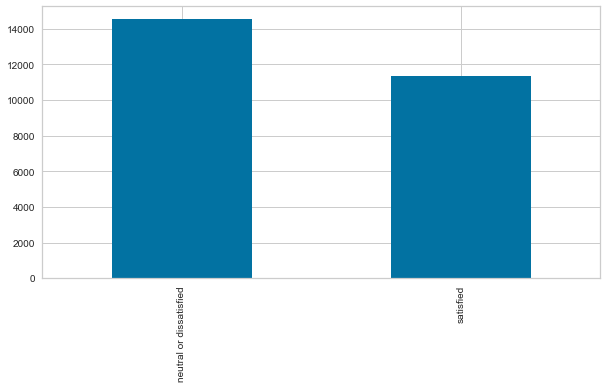

In [5]:
sat['satisfaction'].value_counts().plot(kind='bar')

In [6]:
sat['satisfaction'] = sat['satisfaction'].map({'neutral or dissatisfied': 0,'satisfied': 1})

In [7]:
sat.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
sat = sat.drop(columns = ['Unnamed: 0','id'])

In [9]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  object 
 1   Customer_Type                      25893 non-null  object 
 2   Age                                25893 non-null  int64  
 3   Type_of_Travel                     25893 non-null  object 
 4   Class                              25893 non-null  object 
 5   Flight_Distance                    25893 non-null  int64  
 6   Inflight_wifi_service              25893 non-null  int64  
 7   Departure_Arrival_time_convenient  25893 non-null  int64  
 8   Ease_of_Online_booking             25893 non-null  int64  
 9   Gate_location                      25893 non-null  int64  
 10  Food_and_drink                     25893 non-null  int64  
 11  Online_boarding                    25893 non-null  int

In [10]:
numerical_features = sat.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_features.remove('satisfaction')
categorical_features = sat.select_dtypes(exclude=['float64','int64']).columns.tolist()

In [11]:
numerical_features

['Age',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure_Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On_board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

In [12]:
categorical_features

['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']

In [13]:
len(numerical_features)

18

In [14]:
len(categorical_features)

4

In [15]:
sat.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
sat['Gender'] = sat['Gender'].map({'Female': 0,'Male': 1})

In [17]:
sat.Customer_Type.unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [18]:
sat['Customer_Type'] = sat['Customer_Type'].map({'disloyal Customer': 0,'Loyal Customer': 1})

In [19]:
sat.Type_of_Travel.unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [20]:
sat['Type_of_Travel'] = sat['Type_of_Travel'].map({'Personal Travel': 0,'Business travel': 1})

In [21]:
sat.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [22]:
sat['Class'] = sat['Class'].map({'Eco': 0,'Business': 1, 'Eco Plus': 2})

In [23]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int64  
 1   Customer_Type                      25893 non-null  int64  
 2   Age                                25893 non-null  int64  
 3   Type_of_Travel                     25893 non-null  int64  
 4   Class                              25893 non-null  int64  
 5   Flight_Distance                    25893 non-null  int64  
 6   Inflight_wifi_service              25893 non-null  int64  
 7   Departure_Arrival_time_convenient  25893 non-null  int64  
 8   Ease_of_Online_booking             25893 non-null  int64  
 9   Gate_location                      25893 non-null  int64  
 10  Food_and_drink                     25893 non-null  int64  
 11  Online_boarding                    25893 non-null  int

## Scaling

In [24]:
sat.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,1,52,1,0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,0,1,36,1,1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,1,0,20,1,0,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,1,1,44,1,1,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,0,1,49,1,0,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


In [25]:
predictors_list = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'
        ]

target = sat['satisfaction']
result_X = sat[predictors_list]
print(result_X.shape)
min_max_scaler = preprocessing.MinMaxScaler()
result_X_scaled = min_max_scaler.fit_transform(result_X)

print(result_X_scaled.shape)
sat_scaled = pd.DataFrame(result_X_scaled, columns=predictors_list)
sat_scaled['satisfaction'] = target
sat_scaled.head()

(25893, 22)
(25893, 22)


,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.75,0.6,0.8,0.50,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1.0
1,0.0,1.0,0.371795,1.0,0.5,0.571890,0.2,0.2,0.6,0.00,1.0,0.8,1.00,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0
2,1.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.75,0.4,0.4,0.25,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0
3,1.0,1.0,0.474359,1.0,0.5,0.675687,0.0,0.0,0.0,0.25,0.6,0.8,0.75,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1.0
4,0.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.50,0.8,0.2,0.25,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1.0


# Split into x and y

In [26]:
X = sat.drop('satisfaction', axis=1)
y = sat["satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [27]:
X_train.shape

(18125, 22)

In [28]:
clust_range = list(range(2,21,1))

# K-means

## Elbow

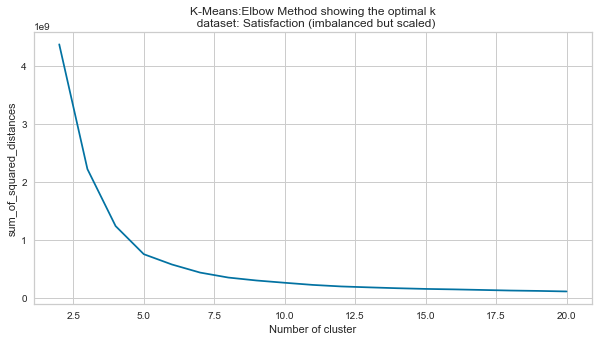

In [29]:
sse = {}
for cluster_size in clust_range:
    kmeans = KMeans(n_clusters=cluster_size, max_iter=10000, random_state=7).fit(X_train)
    sse [cluster_size] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel('sum_of_squared_distances')
plt.title('K-Means:Elbow Method showing the optimal k\n  dataset: Satisfaction (imbalanced but scaled)')
plt.show()

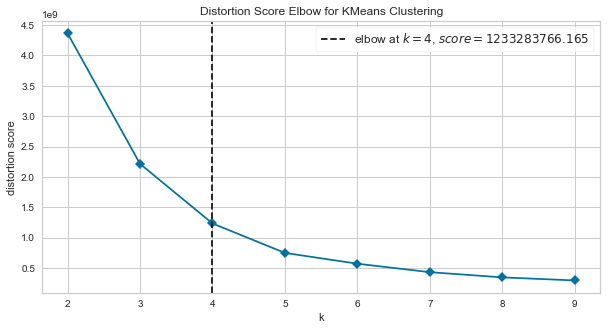

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(X_train)        
visualizer.show()      

In [38]:
kmeans = KMeans(n_clusters=4, max_iter=10000, random_state=7).fit(X_train)
print(f'adjusted_mutual_info_score based on 4 clusters :{adjusted_mutual_info_score((kmeans.labels_), y_train)}')
print(f'adjusted rand index based on 4 clusters :{adjusted_rand_score((kmeans.labels_), y_train)}')
print(f'homogeneity_score based on 4 clusters :{homogeneity_score((kmeans.labels_), y_train)}')
print(f'completeness_score based on 4 clusters :{completeness_score((kmeans.labels_), y_train)}')
print(f'v_measure_score based on 4 clusters :{v_measure_score((kmeans.labels_), y_train)}')
print(f'fowlkes_mallows_score based on 4 clusters :{fowlkes_mallows_score((kmeans.labels_), y_train)}')


adjusted_mutual_info_score based on 4 clusters :0.04874837322866317
adjusted rand index based on 4 clusters :0.05374119530146853
homogeneity_score based on 4 clusters :0.038011324922746816
completeness_score based on 4 clusters :0.06825927301783001
v_measure_score based on 4 clusters :0.04883054120241337
fowlkes_mallows_score based on 4 clusters :0.44165634582896707


## Metrics

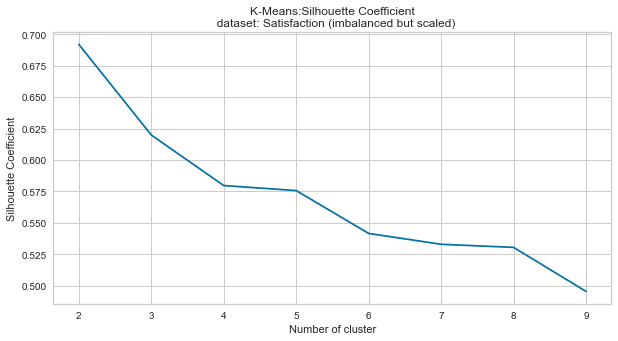

In [46]:
silh = {}
homog = {}
for cluster_size in range(2,10):
    kmeans = KMeans(n_clusters=cluster_size, max_iter=10000, random_state=7).fit(X_train)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    homog_score = homogeneity_score(y_train, label)
    silh[cluster_size] = sil_coeff
    homog[cluster_size] = homog_score
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()),'bx-' )
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.title('K-Means:Silhouette Coefficient\n  dataset: Satisfaction (imbalanced but scaled)')
plt.show()

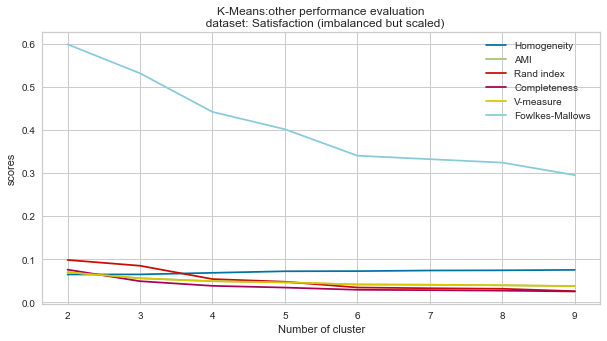

In [47]:
homog = {}
mutual = {}
rand = {}
comple = {}
vmeasure = {}
fowlkes = {}

for cluster_size in range(2,10):
    kmeans = KMeans(n_clusters=cluster_size, max_iter=10000, random_state=7).fit(X_train)
    label = kmeans.labels_
    #sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    homog_score = homogeneity_score(y_train, label)
    mutual_score = adjusted_mutual_info_score(y_train, label)
    rand_score = adjusted_rand_score(y_train, label)
    comple_score = completeness_score(y_train, label)
    vmeasure_score = v_measure_score(y_train, label)
    fowlkes_score = fowlkes_mallows_score(y_train, label)
    
    #silh[cluster_size] = sil_coeff
    homog[cluster_size] = homog_score
    mutual[cluster_size] = mutual_score
    rand[cluster_size] = rand_score
    comple[cluster_size] = comple_score
    vmeasure[cluster_size] = vmeasure_score
    fowlkes[cluster_size] = fowlkes_score
    
    
plt.figure()
plt.plot(list(homog.keys()), list(homog.values()), label="Homogeneity")
plt.plot(list(mutual.keys()), list(mutual.values()), label="AMI")
plt.plot(list(rand.keys()), list(rand.values()), label="Rand index")
plt.plot(list(comple.keys()), list(comple.values()), label="Completeness")
plt.plot(list(vmeasure.keys()), list(vmeasure.values()), label="V-measure")
plt.plot(list(fowlkes.keys()), list(fowlkes.values()), label="Fowlkes-Mallows")

plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("scores")
plt.title('K-Means:other performance evaluation\n  dataset: Satisfaction (imbalanced but scaled)')
plt.show()

In [48]:
def get_kmean_scores(X, y, N):


    def get_kmean(n):
        km = KMeans(n_clusters=n,random_state=7, max_iter=10000)
        km.fit(X)
        km_labels = km.predict(X)
        
        hom = homogeneity_score(y, km_labels)
        ami = adjusted_mutual_info_score(y,km_labels)
        rand = adjusted_rand_score(y,km_labels)
        comple = completeness_score(y,km_labels)
        vmeasure = v_measure_score(y,km_labels)
        fowm = fowlkes_mallows_score(y, km_labels)
        
        
        return hom, ami, rand, comple, vmeasure, fowm 
    
  
    
    n_rng = np.arange(2,N+1)
    scores_df = pd.DataFrame()

    for n in n_rng:
        results = {'n':n}
        hom, ami, rand, comple, vmeasure, fowm  = get_kmean(n)            
        results[f"hom"] = hom; results[f"ami"] = ami; results[ f"rand"] = rand; results[f"comple"] = comple; results[f"vmeasure"] = vmeasure; results[f"fowm"] = fowm 
        print(f" done with N: {n}")
        
        scores_df = scores_df.append(results, ignore_index=True)
            

    return scores_df

In [49]:
def plot_elbow_kmeans(k_metric_df, name='dsname'):
    
    #fig = plt.figure(figsize=[2,3])

    plt.figure()
    
    x_vals = k_metric_df['n'].values
    x_vals = x_vals.astype('int32')
    
    plt.plot(x_vals, k_metric_df['hom'], label="Homogeneity")
    plt.plot(x_vals, k_metric_df['ami'], label="AMI")
    plt.plot(x_vals, k_metric_df['rand'], label="Rand index")
    plt.plot(x_vals, k_metric_df['comple'], label="Completeness")
    plt.plot(x_vals, k_metric_df['vmeasure'], label="V-measure")
    plt.plot(x_vals, k_metric_df['fowm'], label="Fowlkes-Mallows")

    plt.legend()
    plt.xlabel("Number of cluster")
    plt.ylabel("scores")
    plt.title('K-Means:other performance evaluation\n dataset: %s '%name)
    plt.show()

In [50]:
scores_df = get_kmean_scores(X_train, y_train, 10)

 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10


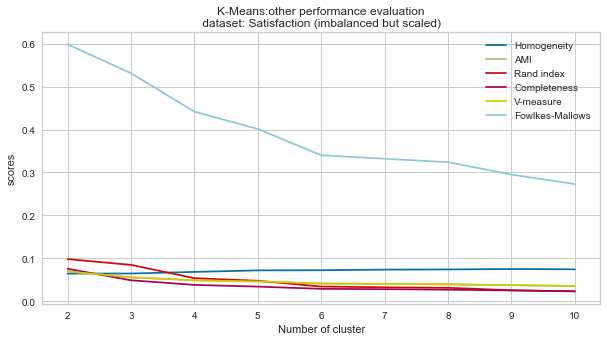

In [51]:
plot_elbow_kmeans(scores_df, 'Satisfaction (imbalanced but scaled)')

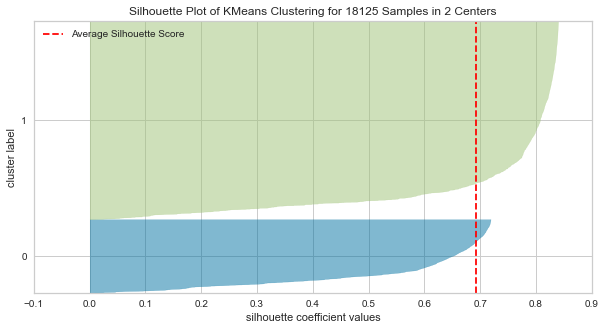

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 18125 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
#2
model = KMeans(2, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()   

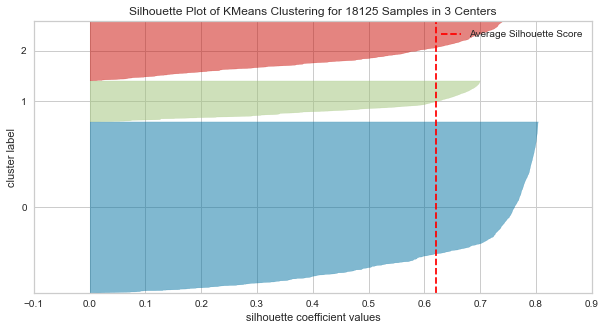

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 18125 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
#3
model = KMeans(3, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()  

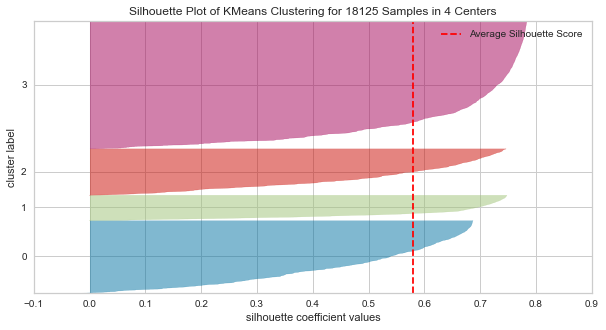

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 18125 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
#4
model = KMeans(4, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()  

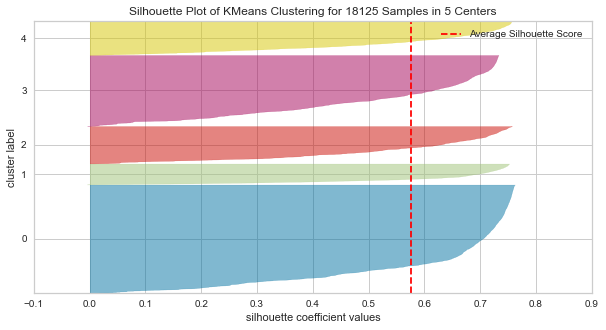

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 18125 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
#5
model = KMeans(5, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()  

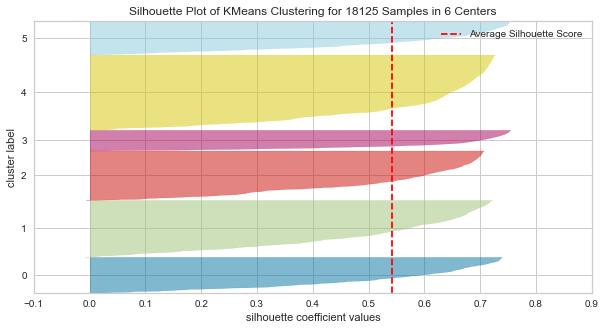

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 18125 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
#6
model = KMeans(6, random_state=7)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()  

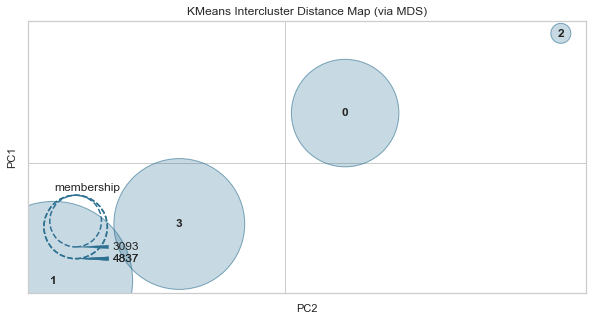

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [51]:
model = KMeans(4)
visualizer = InterclusterDistance(model, random_state=7)
visualizer.fit(X_train)        
visualizer.show()   

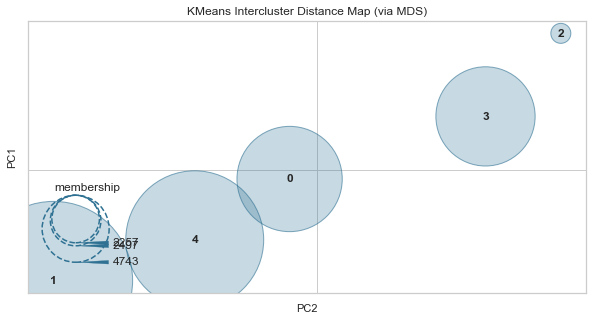

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [52]:
model = KMeans(5)
visualizer = InterclusterDistance(model, random_state=7)
visualizer.fit(X_train)       
visualizer.show()   

In [53]:
kmeans = KMeans(n_clusters=5, max_iter=10000, random_state=7).fit(X_train)
print(f'adjusted_mutual_info_score based on 5 clusters :{adjusted_mutual_info_score((kmeans.labels_), y_train)}')
print(f'adjusted rand index based on 5 clusters :{adjusted_rand_score((kmeans.labels_), y_train)}')
print(f'homogeneity_score based on 5 clusters :{homogeneity_score((kmeans.labels_), y_train)}')
print(f'completeness_score based on 5 clusters :{completeness_score((kmeans.labels_), y_train)}')
print(f'v_measure_score based on 5 clusters :{v_measure_score((kmeans.labels_), y_train)}')
print(f'fowlkes_mallows_score based on 5 clusters :{fowlkes_mallows_score((kmeans.labels_), y_train)}')

adjusted_mutual_info_score based on 5 clusters :0.04609734847829159
adjusted rand index based on 5 clusters :0.04759206047371857
homogeneity_score based on 5 clusters :0.034038095294440684
completeness_score based on 5 clusters :0.07186552834590675
v_measure_score based on 5 clusters :0.04619607182716562
fowlkes_mallows_score based on 5 clusters :0.4013477097600726


# EM

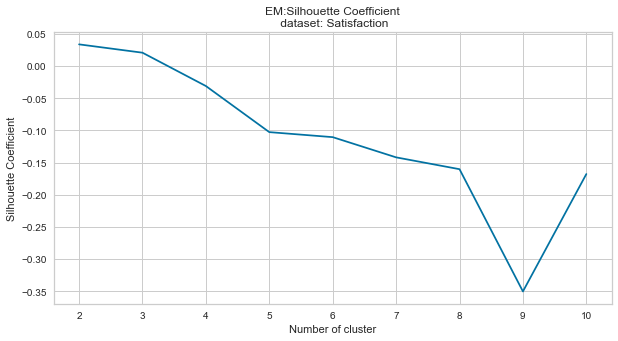

In [54]:
# Churn dataset on EM
silh_em = {}
homog_em = {}
ll_em = {}
for cluster in range(2,11):
    gmm = GaussianMixture(n_components=cluster, max_iter=10000, random_state=7, 
                          n_init=5).fit(X_train)
    label = gmm.predict(X_train)
    sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    homog_score = homogeneity_score(y_train, label)
    silh_em[cluster] = sil_coeff
    homog_em[cluster] = homog_score
    ll_em[cluster] = gmm.score(X_test)
plt.figure()
plt.plot(list(silh_em.keys()), list(silh_em.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.title("EM:Silhouette Coefficient\n dataset: Satisfaction")
plt.show()

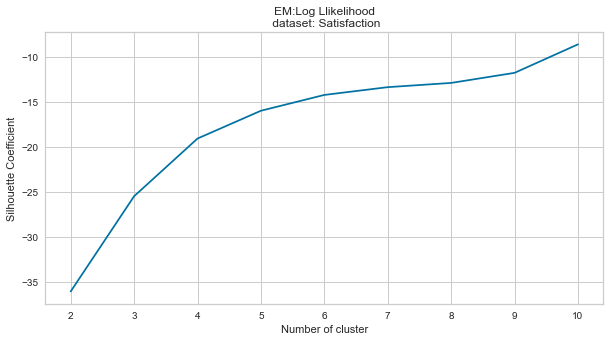

In [55]:
plt.figure()
plt.plot(list(ll_em.keys()), list(ll_em.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.title("EM:Log Llikelihood\n dataset: Satisfaction")
plt.show()

In [56]:
def get_em_results_names():
    cv_types = ["spherical", "tied", "diag", "full"]
    score_types = ["sil","bic","hom", "fowm", "ami"]
    names = [f"{sc}_{cv}" for sc in score_types for cv in cv_types] 
    return names



def get_em_scores(X, y, N):


    def get_em(n, cv_t):
        gmm = GMM(n_components=n, covariance_type=cv_t, warm_start=True, random_state=7)
        gmm.fit(X)
        gmm_labels = gmm.predict(X)

        ss = silhouette_score(X, gmm_labels, metric='euclidean')
        bic = gmm.bic(X)
        hom = homogeneity_score(y, gmm_labels)
        fowm = fowlkes_mallows_score(y, gmm_labels)
        ami = adjusted_mutual_info_score(y,gmm_labels)
        return ss, bic, hom, fowm, ami
    
    cv_types = ["spherical", "tied", "diag", "full"]
        
    
    n_rng = np.arange(2,N+1)
    
    names =['n'] + get_em_results_names()

    scores_df = pd.DataFrame(columns=names)

    for n in n_rng:
        results = {'n':n}
        for cv_t in cv_types:
            ss_em, bic, hom, fowm, ami = get_em(n,cv_t)            
            results[ f"sil_{cv_t}"] =  ss_em; results[f"bic_{cv_t}"] = bic ; results[f"hom_{cv_t}"] = hom; results[f"fowm_{cv_t}"] = fowm; results[f"ami_{cv_t}"] = ami
        print(f" done with N: {n}")
        
        scores_df = scores_df.append(results, ignore_index=True)
            

    return scores_df

In [57]:
def plot_elbow_em(k_metric_df, name='dsname', face_color=None):
    
    figsave=False
    
    
    fig = plt.figure(figsize=[20,5])
    ax1 = fig.add_subplot(151)
    ax2 = fig.add_subplot(152)
    ax3 = fig.add_subplot(153)
    ax4 = fig.add_subplot(154)
    ax5 = fig.add_subplot(155)
    allAxs = [ax1, ax2, ax3, ax4, ax5] 

    
    x_vals = k_metric_df['n'].values
    x_vals = x_vals.astype('int32')

    for cv_t in ["spherical", "tied", "diag", "full"]:
        
        ax1.plot(x_vals, k_metric_df['sil_'+cv_t], label=f"{cv_t}")
        ax2.plot(x_vals, k_metric_df['bic_'+cv_t], label=f"{cv_t}")
        ax3.plot(x_vals, k_metric_df['hom_'+cv_t], label=f"{cv_t}")
        ax4.plot(x_vals, k_metric_df['fowm_'+cv_t], label=f"{cv_t}")
        ax5.plot(x_vals, k_metric_df['ami_'+cv_t], label=f"{cv_t}")
   
    ax1.set_xticks(x_vals); ax2.set_xticks(x_vals); ax3.set_xticks(x_vals); ax4.set_xticks(x_vals);ax5.set_xticks(x_vals)
    
    if face_color != None:
        for ax in allAxs:
            ax.set_facecolor(face_color)

    ax1.legend(); ax1.set_ylabel("Silhouette Score"); ax1.set_xlabel("Number of cluster");ax1.grid(True)
    ax2.legend(); ax2.set_ylabel("Bic Score"); ax2.set_xlabel("Number of cluster");ax2.grid(True)
    ax3.legend(); ax3.set_ylabel("Homogeneity Score"); ax3.set_xlabel("Number of cluster"); ax3.grid(True)
    ax4.legend(); ax4.set_ylabel("Fowlkes-Mallows Score"); ax4.set_xlabel("Number of cluster"); ax4.grid(True)
    ax5.legend(); ax5.set_ylabel("AMI Score"); ax5.set_xlabel("Number of cluster"); ax5.grid(True)

    ax1.set_title('EM: Elbow silhouette score\n  dataset: %s '%name)
    ax2.set_title('EM: BIC score\n  dataset: %s '%name)
    ax3.set_title('EM: Homogeneity score\n  dataset: %s '%name)
    ax4.set_title('EM: Fowlkes-Mallows score\n  dataset: %s '%name)
    ax5.set_title('EM: Ajusted Mutual Information score\n  dataset: %s '%name)



    fig.tight_layout()
    plt.show()

    #if figsave:
    #    fig.savefig('plots/em_cov_%s_results.png'%short_name, bbox_inches='tight')
    #    plt.close(fig=fig)
    #else:
    #    plt.show()

In [58]:
scores_x = get_em_scores(X_train, y_train, 10)

 done with N: 2
 done with N: 3
 done with N: 4
 done with N: 5
 done with N: 6
 done with N: 7
 done with N: 8
 done with N: 9
 done with N: 10


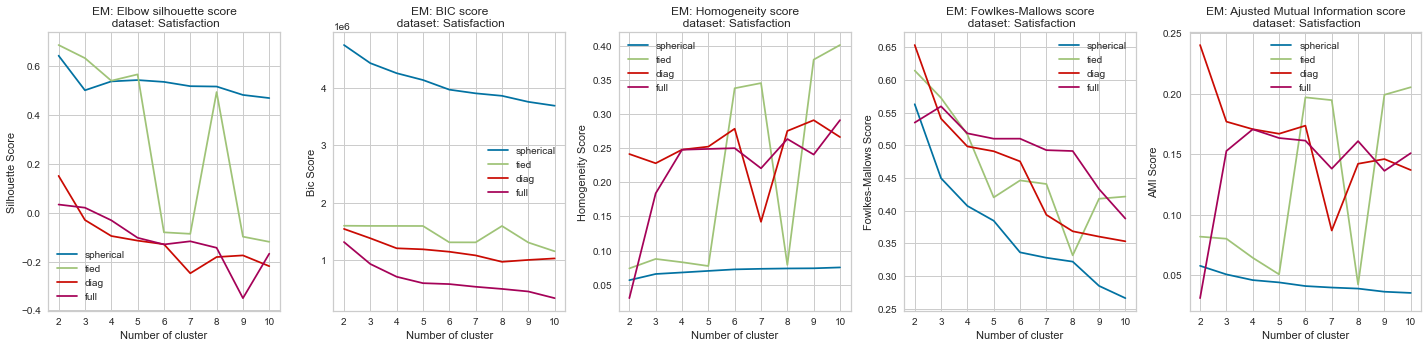

In [59]:
plot_elbow_em(scores_x, 'Satisfaction')

# Feature Reduction

## PCA

In [ ]:
pca = PCA(random_state=7)
pca.fit(X_train)
pca_ind = pca.explained_variance_ratio_
print(pca_ind)